# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# Reading and Understanding Data

In [4]:
data = pd.read_csv('day.csv')
data.shape

(730, 16)

In [5]:
data.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [6]:
## Renaming columns for better readability

data = data.rename(columns={'dteday':'date','yr':'year','mnth':'month','hum':'humidity'})

In [7]:
data.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   date        730 non-null    object 
 2   season      730 non-null    int64  
 3   year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
(data.isnull().sum())/data.shape[0]

instant       0.0
date          0.0
season        0.0
year          0.0
month         0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### `Inference`: There are no null values.

In [10]:
data.drop_duplicates().shape

(730, 16)

#### Shape of the dataframe remains same

#### `Rows - 730, Columns: 16` : There are no duplicates  

# Cleaning the Data

In [11]:
data.head(2)

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


#### Dropping the columns that are not useful for analysis
- `instant` can be removed as it is just a row identifies
- `date`can be removed as there are other columns like `year, month, weekday` represents the date and here we are not considering day to day demand.
- `casual` and `registered` is just breakup of total users into casual and registered which is summed up and shown in cnt column. so it is redundant data and can be removed.

In [12]:
data.drop(['instant','date','casual','registered'], axis = 1, inplace = True)

In [13]:
data['weathersit'].value_counts(dropna=False)

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [14]:
data.season = data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
data.month = data.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
data.weekday = data.weekday.map({6:'sun',0:'mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat'})
data.weathersit = data.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain'})

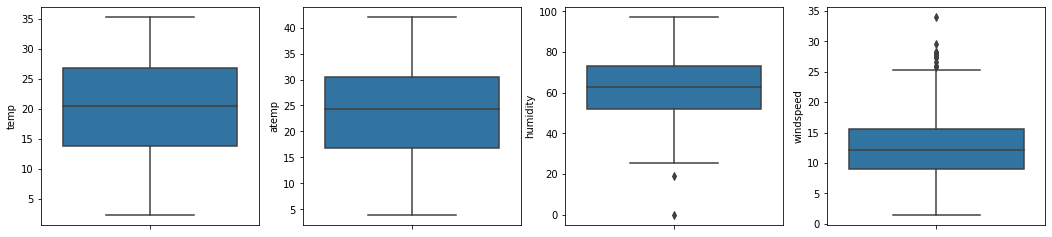

In [15]:
# Box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(18,4))

plots = 1
for col in cols:
    plt.subplot(1,4,plots)
    sns.boxplot(y=col, data=data)
    plots+=1

#### These plots show there is no outlier treatment required. The values are continous beyond the iQR

In [16]:
data.year.unique()

array([0, 1], dtype=int64)

#### EDA

In [17]:
data.head(2)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sun,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,mon,0,Misty,14.902598,17.68695,69.6087,16.652113,801


In [18]:
def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=data)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=data, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

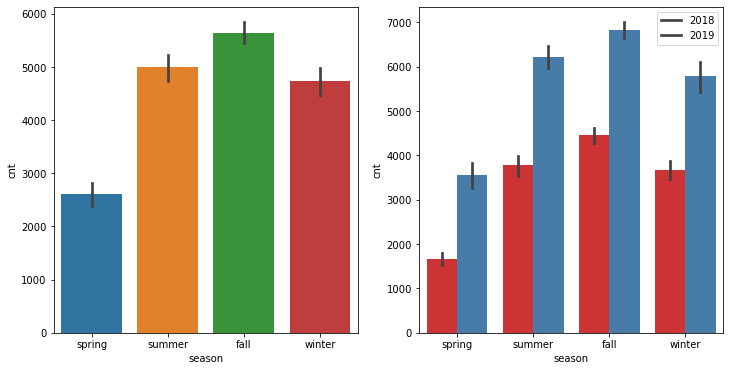

In [19]:
plot_cat_columns('season')

- There is high amount of bike sharing during the Fall month and there is significant increase from 2018 to 2019

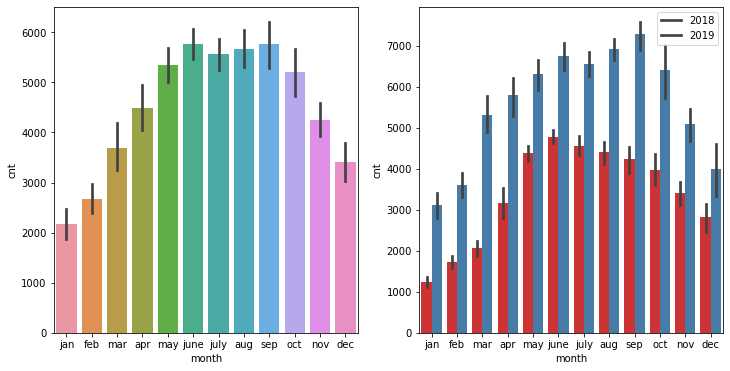

In [20]:
plot_cat_columns('month')

- High amount of the bike sharing booking happened between May and October month

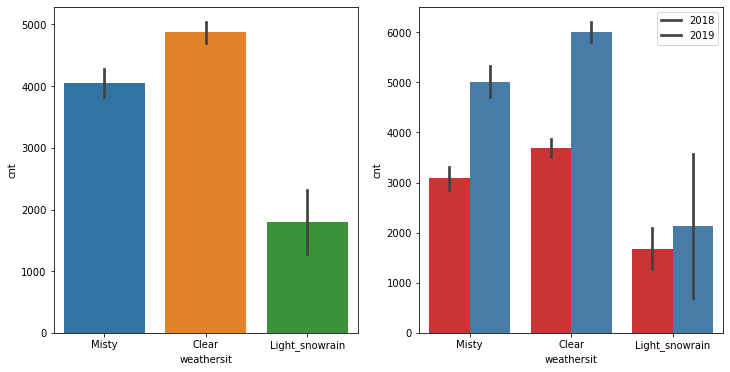

In [21]:
plot_cat_columns('weathersit')

- Good Weather condition has attracted more users
- Its to be noted there is no bookings on heavy weather condition 

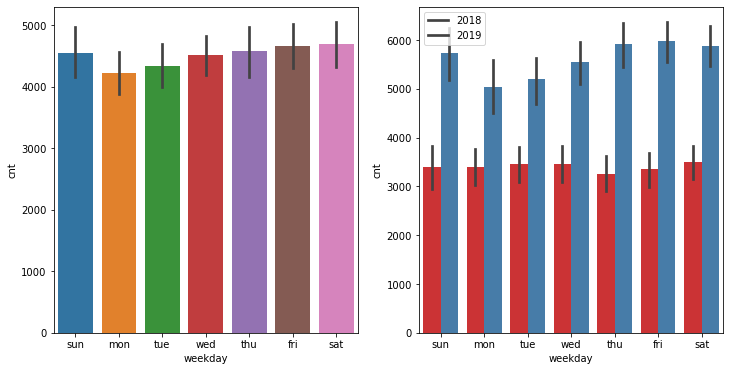

In [22]:
plot_cat_columns('weekday')

- Fri, Sat, Sun has attracted more bookings

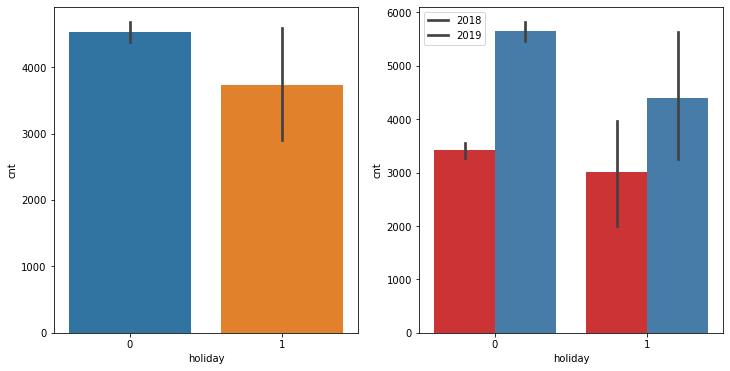

In [23]:
plot_cat_columns('holiday')

- Holidays has comparitively less number of bookings shows the fact people prefers to stay in their home and relax during holidays

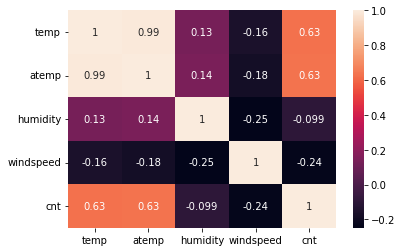

In [24]:
# Checking continuous variables relationship with each other
sns.heatmap(data[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True)
plt.show()

- `temp` and `atemp` shows a little sign of positive correlation with target variable `cnt` 
- `temp` and `atemp` is highly correlated(R=0.99). Atemp seems to be derived from temp due to which it shows high positive correlation. So the `atemp` column dropped.

Let's see it visually

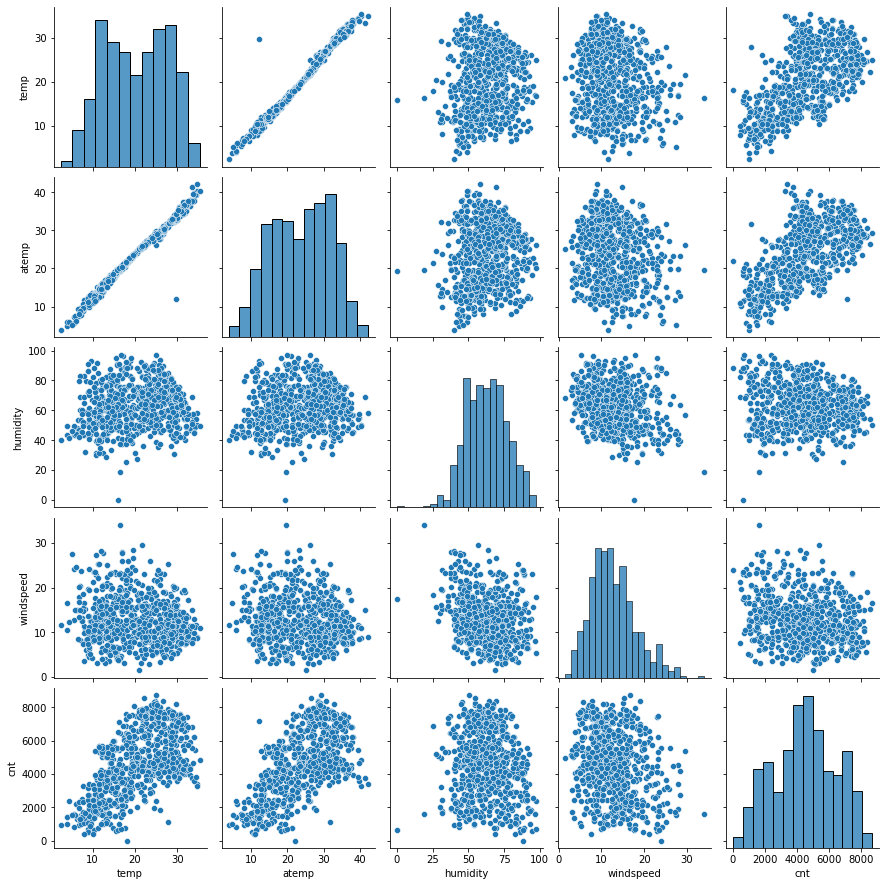

In [25]:
sns.pairplot(data=data,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

<Figure size 1800x720 with 0 Axes>

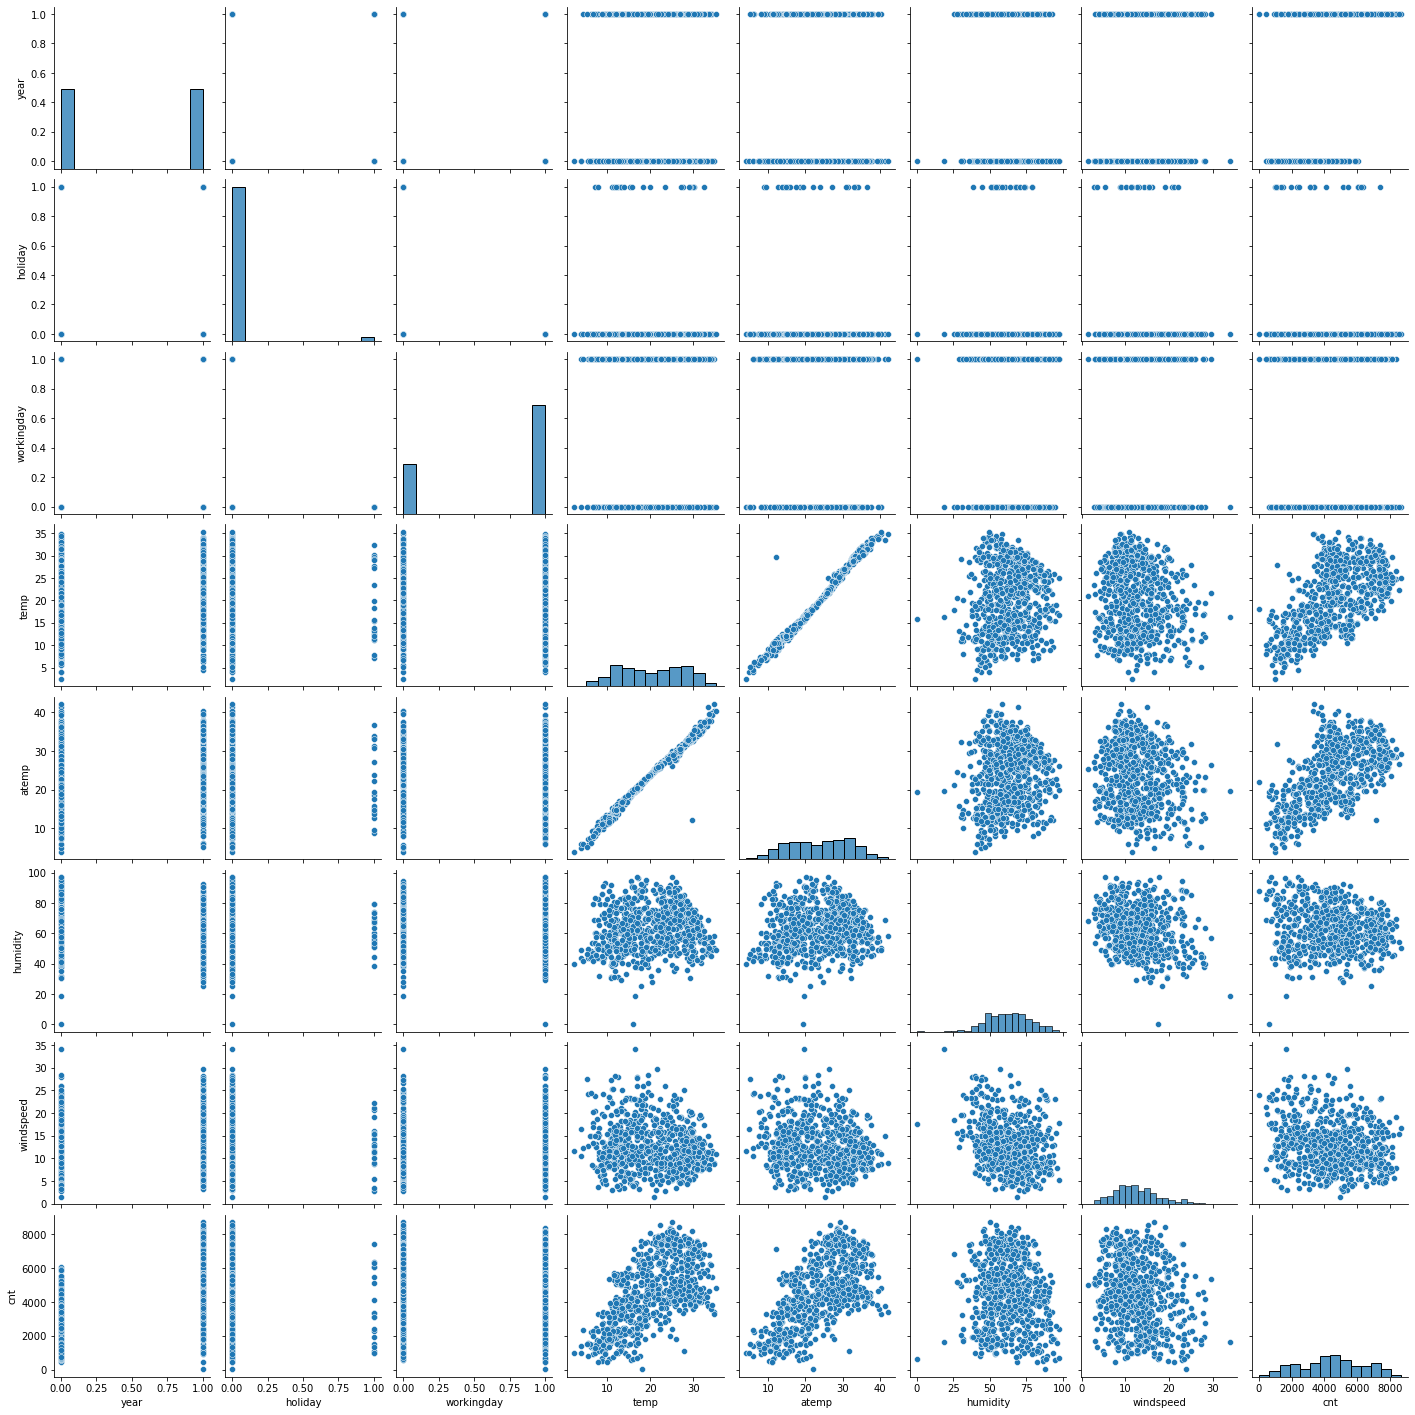

In [26]:
#Correlations 
plt.figure(figsize=(25,10))
sns.pairplot(data)
plt.show()

In [27]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months=pd.get_dummies(data.month,drop_first=True)
weekdays=pd.get_dummies(data.weekday,drop_first=True)
weathersit=pd.get_dummies(data.weathersit,drop_first=True)
seasons=pd.get_dummies(data.season,drop_first=True)

# Merging  the dataframe, with the dummy variable dataset. 

data_v1 = pd.concat([data, months, weekdays, weathersit, seasons],axis=1)
data_v1 = data_v1.drop(['season','month','weekday','weathersit'], axis = 1)

## Train - Test Split

In [28]:
np.random.seed(99)

# Considering 70% of data for training the model
df_train, df_test = train_test_split(data_v1, train_size = 0.7, random_state = 100)

In [29]:
df_train.shape[0], df_test.shape[0]

(510, 220)

In [30]:
scaler = MinMaxScaler()

In [31]:
## scaling the data for numerical columns excluding the dummy variables created from categorical columns

df_train[['temp','atemp','humidity','windspeed','cnt']] = scaler.fit_transform(df_train[['temp','atemp','humidity','windspeed','cnt']])

In [32]:
df_train.head(2)

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0


In [33]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


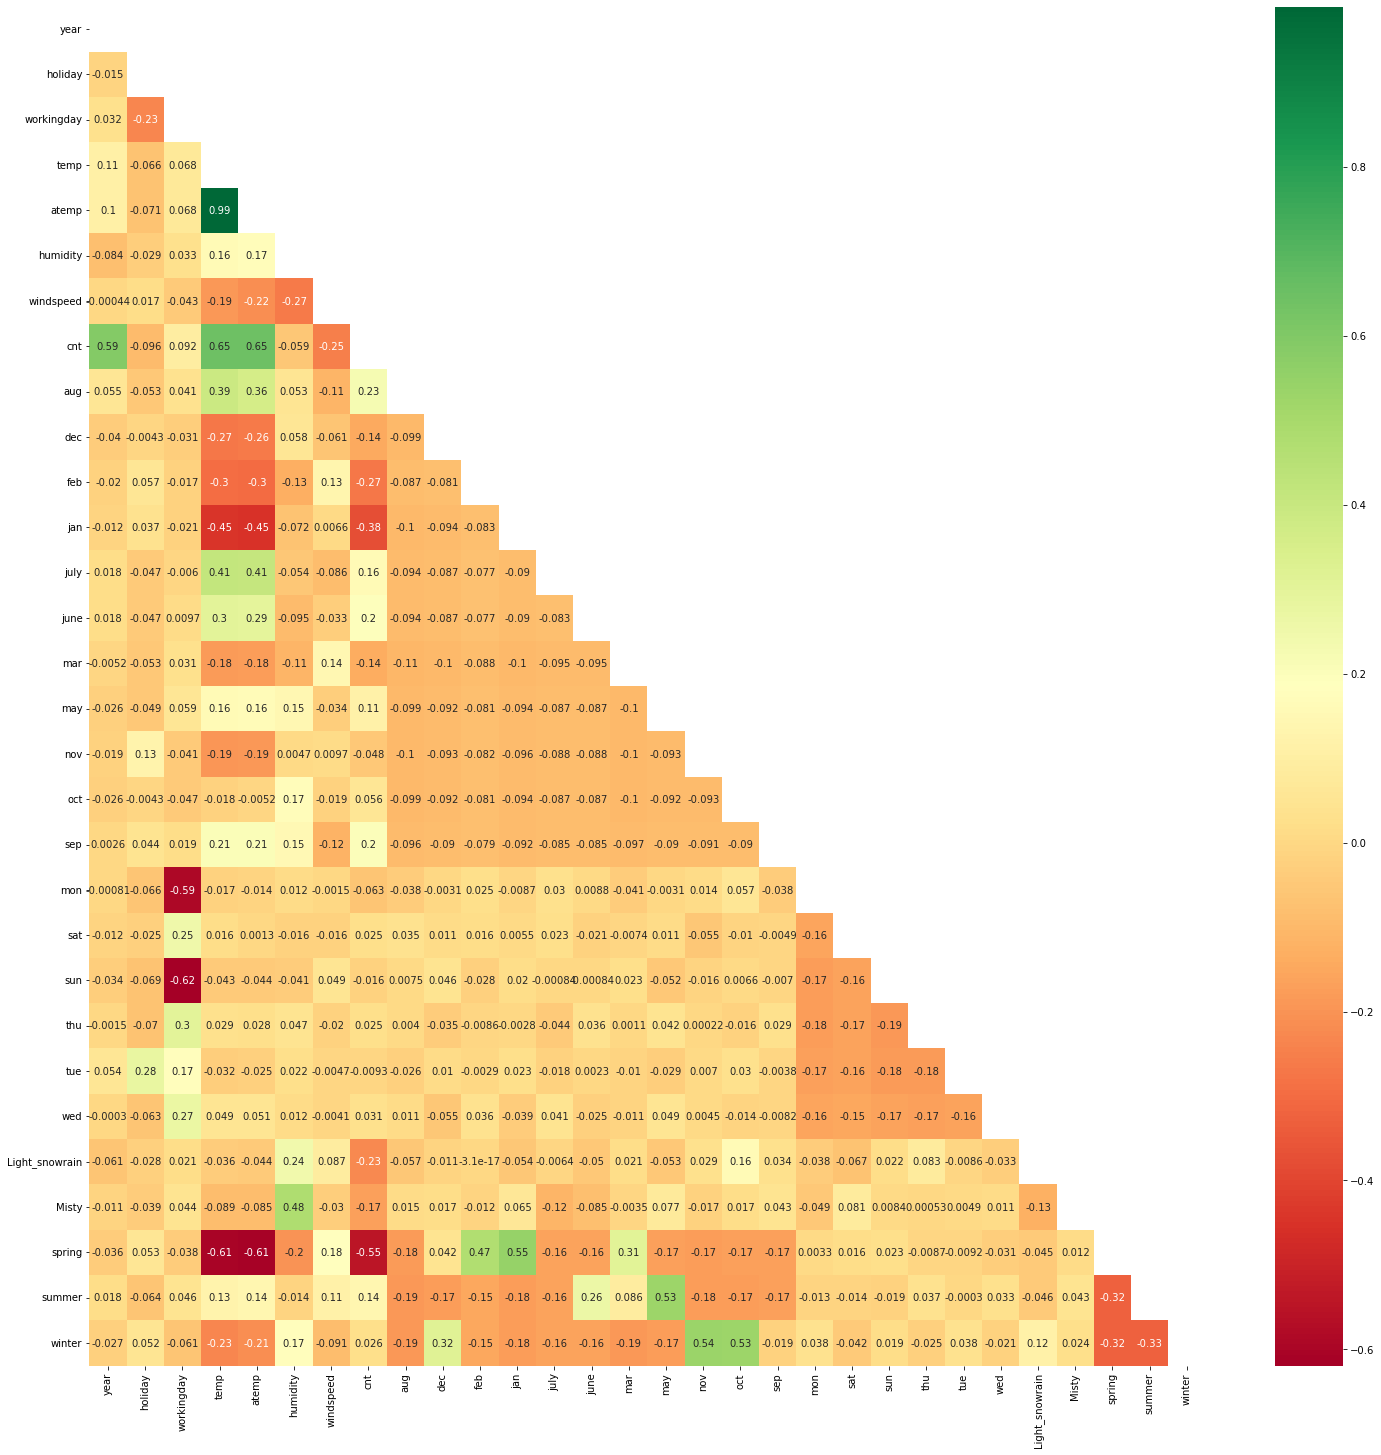

In [34]:
# checking correlation coefficients

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

- days_old and cnt shows some sign of correlation
- temp and atemp shows positive correlation with cnt
- As expected the seasons and underlying months has some correlations

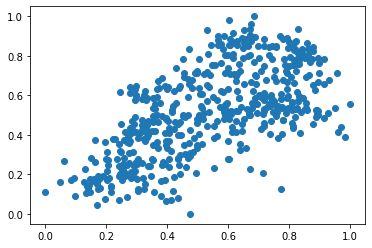

In [35]:
plt.scatter(df_train.temp, df_train.cnt)

- Visualization confirms the positive correlation between temp and cnt.

In [36]:
# Linear Model

y_train = df_train.pop('cnt')
x_train = df_train

In [37]:
# Executing RFE 

lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

In [38]:
print("Columns Resulted from RFE:", x_train.columns[rfe.support_], sep='\n')

Columns Resulted from RFE:
Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'july', 'sep', 'mon', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'summer', 'winter'],
      dtype='object')


In [39]:
print("Columns Excluded from RFE:", x_train.columns[~rfe.support_], sep='\n')

Columns Excluded from RFE:
Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'sat', 'thu', 'tue', 'wed'],
      dtype='object')


In [40]:
cols = x_train.columns[rfe.support_]

In [41]:
x_train_rfe = x_train[cols]

In [42]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

calculateVIF(x_train_rfe)

,Features,VIF
2,workingday,50.68
9,sun,12.20
8,mon,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.62
4,humidity,1.91
11,Misty,1.57


#### workingday has High VIF Value

In [43]:
# Building 1st linear regression model

x_train_lm1 = sm.add_constant(x_train_rfe)
lr1 = sm.OLS(y_train,x_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.11e-191
Time:                        22:23:53   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1995      0.028      7.

In [44]:
# workingday variable can be dropped as it has high VIF value
x_train_new = x_train_rfe.drop(['workingday'], axis = 1)

calculateVIF(x_train_new)

,Features,VIF
3,humidity,28.25
2,temp,16.06
4,windspeed,4.68
11,spring,4.03
13,winter,3.36
12,summer,2.79
10,Misty,2.30
0,year,2.08
5,july,1.59
6,sep,1.39


In [45]:
# Building 2nd linear regression model

x_train_lm2 = sm.add_constant(x_train_new)
lr2 = sm.OLS(y_train,x_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.11e-191
Time:                        22:23:53   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2832      0.034      8.

In [46]:
# sun variable can be dropped as it has P value and humidity as it has high VIF Value
x_train_new = x_train_new.drop(['sun'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(x_train_new)

,Features,VIF
3,humidity,28.24
2,temp,16.04
4,windspeed,4.66
10,spring,4.01
12,winter,3.34
11,summer,2.79
9,Misty,2.30
0,year,2.08
5,july,1.59
6,sep,1.39


In [47]:
# Building 3rd linear regression model

x_train_lm3 = sm.add_constant(x_train_new)
lr3 = sm.OLS(y_train,x_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.8
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.12e-192
Time:                        22:23:53   Log-Likelihood:                 517.20
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -947.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2858      0.034      8.

In [48]:
# humidity can be dropped as it has high VIF Value
x_train_new = x_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(x_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.60
10,summer,2.24
9,spring,2.11
0,year,2.07
11,winter,1.81
4,july,1.59
8,Misty,1.56
5,sep,1.34
6,mon,1.18


In [49]:
# Building 4th linear regression model

x_train_lm4 = sm.add_constant(x_train_new)
lr4 = sm.OLS(y_train,x_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.45e-189
Time:                        22:23:54   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2060      0.029      7.

In [50]:
# july can be dropped as it has P value
x_train_new = x_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(x_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,year,2.07
8,spring,2.02
9,summer,1.91
10,winter,1.66
7,Misty,1.55
4,sep,1.23
5,mon,1.18
6,Light_snowrain,1.08


In [51]:
# Building 5th linear regression model

x_train_lm5 = sm.add_constant(x_train_new)
lr5 = sm.OLS(y_train,x_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.23e-189
Time:                        22:23:54   Log-Likelihood:                 503.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     498   BIC:                            -933.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1981      0.029      6.

- Now the model seems to be significant, Has good F - Statistic = 235.2
- Durbin-Watson value of final model lr5 is 2.102, which signifies there is no autocorrelation.

In [52]:
print(lr5.params)

const             0.198086
year              0.234000
holiday          -0.104300
temp              0.478161
windspeed        -0.148022
sep               0.089359
mon              -0.049479
Light_snowrain   -0.290403
Misty            -0.080899
spring           -0.054372
summer            0.062284
winter            0.096907
dtype: float64


## Residual Analysis

In [53]:
x_train_lm5.head()

,const,year,holiday,temp,windspeed,sep,mon,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,1,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,0,1,0,1,0


In [54]:
y_train_pred = lr5.predict(x_train_lm5)

### Normality of errors

Text(0.5, 0, 'Errors')

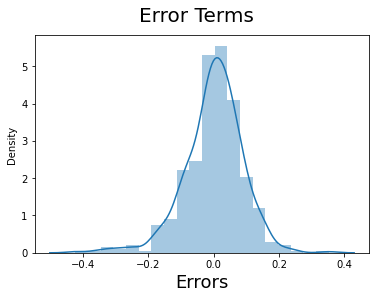

In [55]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

- Normal distribution in error terms

In [56]:
calculateVIF(x_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,year,2.07
8,spring,2.02
9,summer,1.91
10,winter,1.66
7,Misty,1.55
4,sep,1.23
5,mon,1.18
6,Light_snowrain,1.08


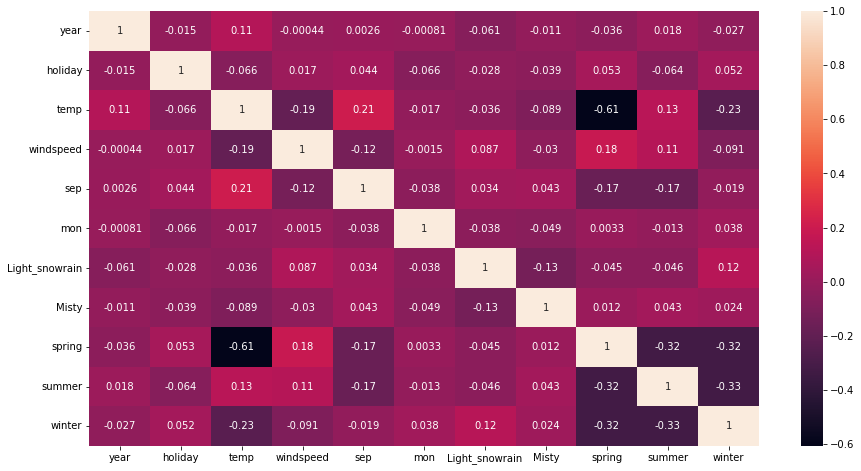

In [57]:
plt.figure(figsize=(15,8))
sns.heatmap(x_train_new.corr(),annot = True)
plt.show()

- No multicolienarity as shown by heatmap

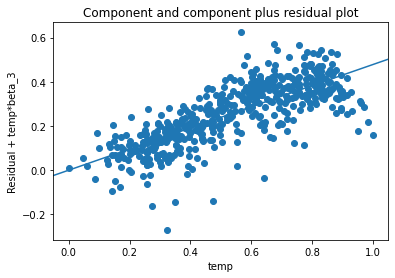

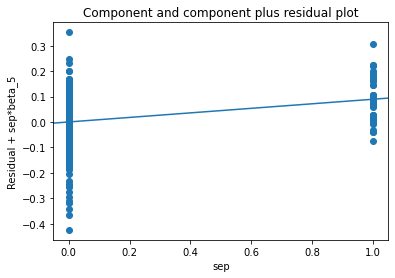

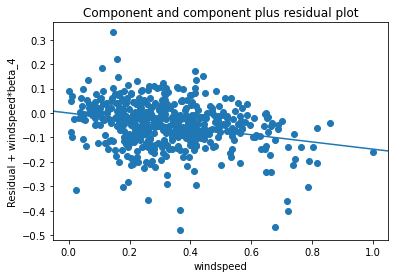

In [58]:
# Relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr5, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr5, 'windspeed')
plt.show()

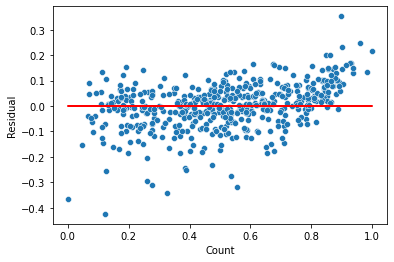

In [59]:
# covariance Uniformity 

y_train_pred = lr5.predict(x_train_lm5)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- No patterns on residual plot

## Prediction using Final Model

In [60]:
# Applying scaling on the test dataset

df_test[['temp', 'atemp', 'humidity', 'windspeed','cnt']] = scaler.transform(df_test[['temp', 'atemp', 'humidity', 'windspeed','cnt']])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [61]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.145455,0.177273,0.118182,0.100000,0.127273,0.168182,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.353363,0.382770,0.323559,0.300684,0.334038,0.374881,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
y_test = df_test.pop('cnt')
x_test = df_test

In [63]:
col1 = x_train_new.columns

x_test = x_test[col1]

# Adding constant variable to test dataframe
x_test_lm6 = sm.add_constant(x_test)

In [64]:
y_pred = lr5.predict(x_test_lm6)

In [65]:
rsqr = r2_score(y_test, y_pred)
round(rsqr,4)

0.8066

## Model Evaluation

Text(0, 0.5, 'y_pred')

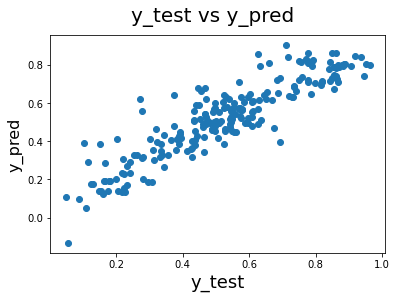

In [66]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [67]:
# best fit eqn

round(lr5.params,4)

const             0.1981
year              0.2340
holiday          -0.1043
temp              0.4782
windspeed        -0.1480
sep               0.0894
mon              -0.0495
Light_snowrain   -0.2904
Misty            -0.0809
spring           -0.0544
summer            0.0623
winter            0.0969
dtype: float64

In [68]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_rsqr = round(1-(1-rsqr)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
print(adjusted_rsqr)

0.7963


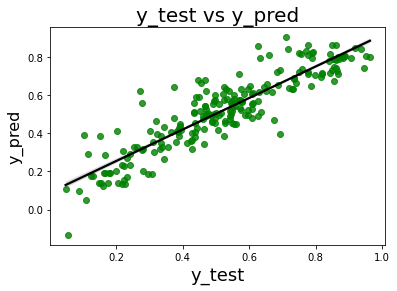

In [69]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "black"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

- Train dataset R^2          : 0.839
- Test dataset R^2           : 0.8066
- Train dataset Adjusted R^2 : 0.835   
- Test dataset Adjusted R^2  : 0.7963

### Demand of bikes depend on year, holiday, temp, windspeed, sep, mon, Light_snowrain, Misty, spring, summer and winter.